In [24]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [25]:
# Load in the data
fashion_mnist = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/255., x_test/255.
y_train, y_test = y_train.flatten(), y_test.flatten()

print('x_train.shape: ', x_train.shape)
print('y_train.shape: ', y_train.shape)

x_train.shape:  (50000, 32, 32, 3)
y_train.shape:  (50000,)


In [26]:
# Number of classes
K = len(set(y_train))
print('number of classes: ', K)

number of classes:  10


In [27]:
# Build the model using functional API
i = Input(shape=x_train[0].shape)
# x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
# x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
# x = Conv2D(128, (3,3), strides=2, activation='relu')(x)

x = Conv2D(32, (3,3), activation='relu', padding='same')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
# x = Dropout(0.2)(x)

# x = GlobalMaxPooling2D()(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [28]:
# Compile and fit
# Note: make sure you are using the GPU to speed things up
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 168s 107ms/step - loss: 1.7777 - accuracy: 0.4466 - val_loss: 1.0090 - val_accuracy: 0.6498
Epoch 2/15
1563/1563 [==============================] - 186s 119ms/step - loss: 0.8782 - accuracy: 0.6938 - val_loss: 0.8456 - val_accuracy: 0.7122
Epoch 3/15
1563/1563 [==============================] - 194s 124ms/step - loss: 0.7050 - accuracy: 0.7568 - val_loss: 0.8725 - val_accuracy: 0.7109
Epoch 4/15
1563/1563 [==============================] - 219s 140ms/step - loss: 0.5719 - accuracy: 0.8023 - val_loss: 0.7323 - val_accuracy: 0.7517
Epoch 5/15
1563/1563 [==============================] - 196s 126ms/step - loss: 0.4814 - accuracy: 0.8338 - val_loss: 0.6015 - val_accuracy: 0.8012
Epoch 6/15
1563/1563 [==============================] - 272s 174ms/step - loss: 0.3990 - accuracy: 0.8581 - val_loss: 0.5935 - val_accuracy: 0.8063
Epoch 7/15
1563/1563 [==============================] - 247s 158ms/step - loss: 0.3419 - accuracy: 0.8823 - val_

In [ ]:
# Data augmentation for improved run
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0]//batch_size
r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

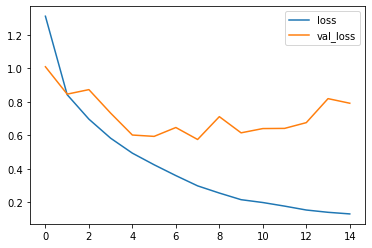

In [29]:
# Plot the loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

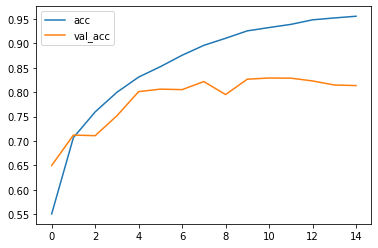

In [30]:
# Plot the accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix without normalization
[[851   5  24  23  14  15   5   5  32  26]
 [ 13 852   3  12   3   2   4   5  18  88]
 [ 45   0 715  56  45  83  35   8   6   7]
 [  9   0  47 669  27 200  29  11   1   7]
 [ 12   0  33  66 802  51  16  15   1   4]
 [  3   1  30  84  18 840   4  15   1   4]
 [  6   2  43  60  20  44 816   1   5   3]
 [  8   0  17  38  60  74   4 793   0   6]
 [ 44   7  13  13   3  10   6   0 880  24]
 [ 20  23   4   6   3   6   3   6  11 918]]


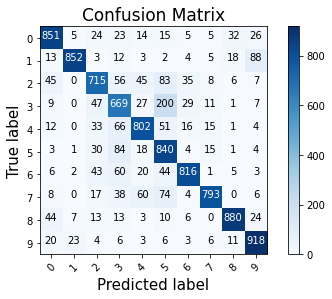

In [31]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):

    
    # This function prints and plots the confusion matrix.
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
        
    else:
        print('Confusion matrix without normalization')
        
    print(cm)
    
    plt.figure()#figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=17)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),
                 horizontalalignment='center',
                 color='white' if cm[i,j] > thresh else 'black')
        
    plt.tight_layout()
    plt.xlabel('Predicted label', fontsize=15)
    plt.ylabel('True label', fontsize=15)
    plt.show()
    
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [32]:
# Label mapping
labels = '''airplane
automobile
brid
cat
deer
dog
frog
horse
ship
tuck'''.split()

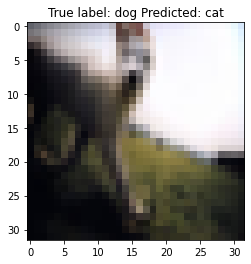

In [33]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title('True label: %s Predicted: %s' % (labels[y_test[i]], labels[p_test[i]]));

In [34]:
# Summarize the model because it's so large
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        1849